In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.9.1
Num GPUs Available:  1


In [6]:
LR = 5e-4
batch_size = 6
epochs = 70
patience = 30
dropout = 0.7
model_name = f'model3_lab_6_lr{LR:.0e}_b{batch_size}_do{dropout}'
model_name = 'test'

dataset_dir = 'apartment'

input_shape = (60, 60, 3)
num_classes = 3
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(num_classes, activation='softmax'),
    ]
)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(LR),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_38 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 15, 15, 16)        2320      
                                                                 
 batch_normalization_39 (Bat  (None, 15, 15, 16)       64        
 chNormalization)                                                
                                                      

In [7]:
train_generator = ImageDataGenerator(
        rotation_range=360,
        height_shift_range=0.5,
        width_shift_range=0.5,
        shear_range=70,
        brightness_range=(0.5, 1),
        zoom_range=[0.6, 1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        rescale=1./255,
)

valid_generator = ImageDataGenerator(
        rotation_range=360,
        brightness_range=(0.5, 1),
        zoom_range=[0.6, 1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        rescale=1./255,
)

train_flow = train_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'{dataset_dir}/train',
        shuffle=True,
        target_size=input_shape[:-1],
    )

valid_flow = valid_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'{dataset_dir}/valid',
        shuffle=True,
        target_size=input_shape[:-1],
    )

test_flow = valid_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'{dataset_dir}/test',
        shuffle=False,
        target_size=input_shape[:-1],
    )

Found 240 images belonging to 3 classes.
Found 42 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


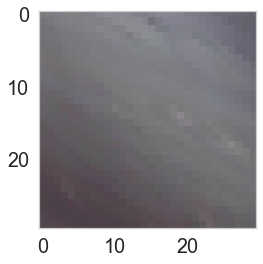

In [8]:
sns.set_style("whitegrid", {'axes.grid' : False})
for _ in range(5):
    img, label = train_flow.next()
    #print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    #plt.imsave('augment.jpg', img[0])

In [27]:
STEP_SIZE_TRAIN=train_flow.n//train_flow.batch_size
STEP_SIZE_VALID=valid_flow.n//valid_flow.batch_size

checkpoint = tf.keras.callbacks.ModelCheckpoint(f'trained_models/{model_name}', save_best_only=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
history = model.fit(train_flow,
            steps_per_epoch=STEP_SIZE_TRAIN,
            validation_data=valid_flow,
            validation_steps=STEP_SIZE_VALID,
            epochs=epochs,
            callbacks=[stop_early, checkpoint],
)

Epoch 1/70
36/40 [==========================>...] - ETA: 0s - loss: 2.7315 - accuracy: 0.3657

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 4s 71ms/step - loss: 2.6137 - accuracy: 0.3750 - val_loss: 1.0917 - val_accuracy: 0.3810
Epoch 2/70
39/40 [============================>.] - ETA: 0s - loss: 1.8927 - accuracy: 0.3205

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 71ms/step - loss: 1.8742 - accuracy: 0.3208 - val_loss: 1.0882 - val_accuracy: 0.4286
Epoch 3/70
39/40 [============================>.] - ETA: 0s - loss: 1.5916 - accuracy: 0.3291

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 69ms/step - loss: 1.5837 - accuracy: 0.3292 - val_loss: 1.0874 - val_accuracy: 0.4762
Epoch 4/70
40/40 [==============================] - ETA: 0s - loss: 1.4856 - accuracy: 0.3417

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 65ms/step - loss: 1.4856 - accuracy: 0.3417 - val_loss: 1.0817 - val_accuracy: 0.4762
Epoch 5/70
39/40 [============================>.] - ETA: 0s - loss: 1.4335 - accuracy: 0.3333

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 66ms/step - loss: 1.4399 - accuracy: 0.3333 - val_loss: 1.0460 - val_accuracy: 0.5714
Epoch 6/70
37/40 [==========================>...] - ETA: 0s - loss: 1.3700 - accuracy: 0.3649

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 74ms/step - loss: 1.3683 - accuracy: 0.3583 - val_loss: 1.0189 - val_accuracy: 0.5000
Epoch 7/70
40/40 [==============================] - ETA: 0s - loss: 1.0895 - accuracy: 0.4417

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 69ms/step - loss: 1.0895 - accuracy: 0.4417 - val_loss: 0.9898 - val_accuracy: 0.5238
Epoch 8/70
40/40 [==============================] - 1s 15ms/step - loss: 1.1640 - accuracy: 0.4042 - val_loss: 1.0164 - val_accuracy: 0.5476
Epoch 9/70
40/40 [==============================] - ETA: 0s - loss: 1.1207 - accuracy: 0.4250

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 68ms/step - loss: 1.1207 - accuracy: 0.4250 - val_loss: 0.9146 - val_accuracy: 0.5476
Epoch 10/70
40/40 [==============================] - 1s 15ms/step - loss: 1.1583 - accuracy: 0.4083 - val_loss: 0.9397 - val_accuracy: 0.5476
Epoch 11/70
40/40 [==============================] - 1s 14ms/step - loss: 1.1244 - accuracy: 0.3917 - val_loss: 0.9447 - val_accuracy: 0.5476
Epoch 12/70
40/40 [==============================] - 1s 14ms/step - loss: 1.1493 - accuracy: 0.3125 - val_loss: 0.9977 - val_accuracy: 0.4524
Epoch 13/70
40/40 [==============================] - 1s 15ms/step - loss: 1.1266 - accuracy: 0.3792 - val_loss: 0.9876 - val_accuracy: 0.5476
Epoch 14/70
40/40 [==============================] - 1s 14ms/step - loss: 1.1164 - accuracy: 0.3792 - val_loss: 0.9783 - val_accuracy: 0.5238
Epoch 15/70
40/40 [==============================] - 1s 15ms/step - loss: 1.0553 - accuracy: 0.4000 - val_loss: 0.9757 - val_accuracy: 0.6190
Epoch 16/70
40/40 

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 72ms/step - loss: 1.0029 - accuracy: 0.4500 - val_loss: 0.8810 - val_accuracy: 0.6429
Epoch 21/70
40/40 [==============================] - 1s 14ms/step - loss: 1.0154 - accuracy: 0.4958 - val_loss: 0.9392 - val_accuracy: 0.6905
Epoch 22/70
40/40 [==============================] - 1s 16ms/step - loss: 0.9749 - accuracy: 0.5125 - val_loss: 0.9590 - val_accuracy: 0.6190
Epoch 23/70
40/40 [==============================] - 1s 14ms/step - loss: 0.9494 - accuracy: 0.4875 - val_loss: 0.9056 - val_accuracy: 0.6667
Epoch 24/70
36/40 [==========================>...] - ETA: 0s - loss: 0.9612 - accuracy: 0.4583

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 65ms/step - loss: 0.9565 - accuracy: 0.4625 - val_loss: 0.8561 - val_accuracy: 0.6667
Epoch 25/70
39/40 [============================>.] - ETA: 0s - loss: 0.8724 - accuracy: 0.5556

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 66ms/step - loss: 0.8789 - accuracy: 0.5500 - val_loss: 0.8470 - val_accuracy: 0.6905
Epoch 26/70
40/40 [==============================] - 1s 15ms/step - loss: 0.9083 - accuracy: 0.5292 - val_loss: 0.8501 - val_accuracy: 0.6905
Epoch 27/70
40/40 [==============================] - ETA: 0s - loss: 0.8630 - accuracy: 0.5667

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 68ms/step - loss: 0.8630 - accuracy: 0.5667 - val_loss: 0.7431 - val_accuracy: 0.7143
Epoch 28/70
38/40 [===========================>..] - ETA: 0s - loss: 0.8868 - accuracy: 0.5439

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 75ms/step - loss: 0.8877 - accuracy: 0.5333 - val_loss: 0.7320 - val_accuracy: 0.7143
Epoch 29/70
38/40 [===========================>..] - ETA: 0s - loss: 0.8857 - accuracy: 0.5614

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 68ms/step - loss: 0.8731 - accuracy: 0.5625 - val_loss: 0.6987 - val_accuracy: 0.6905
Epoch 30/70
40/40 [==============================] - 1s 16ms/step - loss: 0.9030 - accuracy: 0.5875 - val_loss: 0.7709 - val_accuracy: 0.6429
Epoch 31/70
40/40 [==============================] - 1s 15ms/step - loss: 0.8376 - accuracy: 0.5500 - val_loss: 0.7180 - val_accuracy: 0.6429
Epoch 32/70
40/40 [==============================] - 1s 14ms/step - loss: 0.8291 - accuracy: 0.5833 - val_loss: 0.7311 - val_accuracy: 0.6667
Epoch 33/70
37/40 [==========================>...] - ETA: 0s - loss: 0.8275 - accuracy: 0.5721

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 66ms/step - loss: 0.8380 - accuracy: 0.5667 - val_loss: 0.6466 - val_accuracy: 0.7381
Epoch 34/70
40/40 [==============================] - 1s 15ms/step - loss: 0.8610 - accuracy: 0.5833 - val_loss: 0.6914 - val_accuracy: 0.6667
Epoch 35/70
40/40 [==============================] - 1s 15ms/step - loss: 0.8366 - accuracy: 0.6042 - val_loss: 0.7792 - val_accuracy: 0.5238
Epoch 36/70
40/40 [==============================] - 1s 15ms/step - loss: 0.9671 - accuracy: 0.5375 - val_loss: 0.8257 - val_accuracy: 0.4762
Epoch 37/70
39/40 [============================>.] - ETA: 0s - loss: 0.8139 - accuracy: 0.5427

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 72ms/step - loss: 0.8066 - accuracy: 0.5542 - val_loss: 0.6321 - val_accuracy: 0.6905
Epoch 38/70
40/40 [==============================] - ETA: 0s - loss: 0.8424 - accuracy: 0.5458

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 68ms/step - loss: 0.8424 - accuracy: 0.5458 - val_loss: 0.5849 - val_accuracy: 0.8095
Epoch 39/70
40/40 [==============================] - 1s 16ms/step - loss: 0.8605 - accuracy: 0.5500 - val_loss: 0.6800 - val_accuracy: 0.5000
Epoch 40/70
40/40 [==============================] - 1s 14ms/step - loss: 0.8063 - accuracy: 0.6458 - val_loss: 0.6874 - val_accuracy: 0.5714
Epoch 41/70
40/40 [==============================] - 1s 15ms/step - loss: 0.7749 - accuracy: 0.6042 - val_loss: 0.5912 - val_accuracy: 0.8095
Epoch 42/70
39/40 [============================>.] - ETA: 0s - loss: 0.7685 - accuracy: 0.6197

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 68ms/step - loss: 0.7669 - accuracy: 0.6208 - val_loss: 0.5650 - val_accuracy: 0.8810
Epoch 43/70
39/40 [============================>.] - ETA: 0s - loss: 0.8234 - accuracy: 0.5513

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 66ms/step - loss: 0.8235 - accuracy: 0.5542 - val_loss: 0.4881 - val_accuracy: 0.8333
Epoch 44/70
40/40 [==============================] - 1s 15ms/step - loss: 0.7086 - accuracy: 0.6500 - val_loss: 0.5030 - val_accuracy: 0.9048
Epoch 45/70
40/40 [==============================] - 1s 15ms/step - loss: 0.7687 - accuracy: 0.6500 - val_loss: 1.1312 - val_accuracy: 0.3571
Epoch 46/70
40/40 [==============================] - 1s 15ms/step - loss: 0.7960 - accuracy: 0.6000 - val_loss: 0.5737 - val_accuracy: 0.6905
Epoch 47/70
40/40 [==============================] - 1s 14ms/step - loss: 0.7276 - accuracy: 0.6583 - val_loss: 0.5909 - val_accuracy: 0.6429
Epoch 48/70
40/40 [==============================] - 1s 14ms/step - loss: 0.7348 - accuracy: 0.6625 - val_loss: 0.5138 - val_accuracy: 0.7143
Epoch 49/70
36/40 [==========================>...] - ETA: 0s - loss: 0.7534 - accuracy: 0.6204

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 73ms/step - loss: 0.7469 - accuracy: 0.6208 - val_loss: 0.4683 - val_accuracy: 0.8333
Epoch 50/70
40/40 [==============================] - 1s 16ms/step - loss: 0.7711 - accuracy: 0.6125 - val_loss: 0.5335 - val_accuracy: 0.6667
Epoch 51/70
40/40 [==============================] - ETA: 0s - loss: 0.7099 - accuracy: 0.6917

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 67ms/step - loss: 0.7099 - accuracy: 0.6917 - val_loss: 0.4422 - val_accuracy: 0.9048
Epoch 52/70
40/40 [==============================] - 1s 16ms/step - loss: 0.7405 - accuracy: 0.6583 - val_loss: 0.4576 - val_accuracy: 0.9286
Epoch 53/70
36/40 [==========================>...] - ETA: 0s - loss: 0.7180 - accuracy: 0.6852

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 67ms/step - loss: 0.7085 - accuracy: 0.6833 - val_loss: 0.3989 - val_accuracy: 0.8571
Epoch 54/70
40/40 [==============================] - 1s 15ms/step - loss: 0.6929 - accuracy: 0.6875 - val_loss: 0.7447 - val_accuracy: 0.4524
Epoch 55/70
39/40 [============================>.] - ETA: 0s - loss: 0.7409 - accuracy: 0.6282

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 73ms/step - loss: 0.7407 - accuracy: 0.6292 - val_loss: 0.3931 - val_accuracy: 0.8810
Epoch 56/70
40/40 [==============================] - 1s 15ms/step - loss: 0.7141 - accuracy: 0.6833 - val_loss: 0.4549 - val_accuracy: 0.8571
Epoch 57/70
40/40 [==============================] - 1s 15ms/step - loss: 0.7961 - accuracy: 0.6708 - val_loss: 0.4637 - val_accuracy: 0.9286
Epoch 58/70
40/40 [==============================] - 1s 14ms/step - loss: 0.7038 - accuracy: 0.6750 - val_loss: 0.4257 - val_accuracy: 0.9048
Epoch 59/70
40/40 [==============================] - 1s 15ms/step - loss: 0.7336 - accuracy: 0.6667 - val_loss: 0.4513 - val_accuracy: 0.9524
Epoch 60/70
40/40 [==============================] - 1s 14ms/step - loss: 0.6625 - accuracy: 0.7333 - val_loss: 0.8771 - val_accuracy: 0.4762
Epoch 61/70
40/40 [==============================] - 1s 15ms/step - loss: 0.6655 - accuracy: 0.7125 - val_loss: 0.4211 - val_accuracy: 0.9524
Epoch 62/70
40/40 

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 67ms/step - loss: 0.7061 - accuracy: 0.7167 - val_loss: 0.3542 - val_accuracy: 0.9762
Epoch 68/70
40/40 [==============================] - 1s 16ms/step - loss: 0.5928 - accuracy: 0.7458 - val_loss: 0.4720 - val_accuracy: 0.6905
Epoch 69/70
40/40 [==============================] - 1s 15ms/step - loss: 0.6063 - accuracy: 0.7625 - val_loss: 0.4826 - val_accuracy: 0.7619
Epoch 70/70
39/40 [============================>.] - ETA: 0s - loss: 0.6292 - accuracy: 0.7009

INFO:tensorflow:Assets written to: trained_models\test_small\assets


INFO:tensorflow:Assets written to: trained_models\test_small\assets


40/40 [==============================] - 3s 66ms/step - loss: 0.6228 - accuracy: 0.7083 - val_loss: 0.3038 - val_accuracy: 0.9524


In [28]:
# Save training history
hist_df = pd.DataFrame(history.history) 
hist_csv_file = f'trained_models/{model_name}/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [29]:
model = tf.keras.models.load_model('trained_models/' + model_name) #model_name

test_flow.reset()

scores = model.evaluate(test_flow)

print("%s%s: %.2f%%" % ("evaluate ", model.metrics_names[1], scores[1]*100))

8/8 [==============================] - 1s 50ms/step - loss: 0.2905 - accuracy: 0.9556
evaluate accuracy: 95.56%


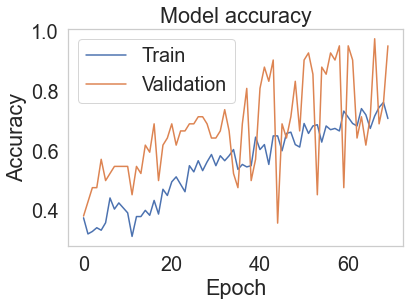

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

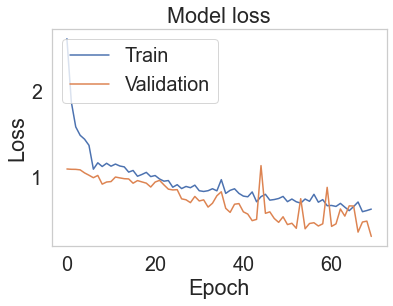

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png')
plt.show()

In [33]:
raw_datasets = f'{dataset_dir} data'
split_datasets = dataset_dir

CLASSES = []
for subdir in os.listdir(raw_datasets):
    CLASSES.append(subdir)
    
print(CLASSES)
    
index = 1
img_num = 34

TEST_IMAGES = []
TEST_LABELS = []
for subdir in os.listdir(split_datasets + '/test'):
    for file in os.listdir(os.path.join(split_datasets, 'test', subdir)):
        a = np.asarray(Image.open(f'{split_datasets}/test/{subdir}/{file}').resize(input_shape[:-1])).astype(np.float32)/255.
        TEST_IMAGES.append(a)
        TEST_LABELS.append(CLASSES.index(subdir))
        
TEST_IMAGES = np.asarray(TEST_IMAGES)
TEST_LABELS = np.asarray(TEST_LABELS)

img = np.asarray(Image.open(f'{raw_datasets}/{CLASSES[index]}/{img_num}.jpg').resize(input_shape[:-1])).astype(np.float32)/255.
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(CLASSES[np.argmax(pred)])

['bedroom floor', 'bedroom table', 'kitchen table']
1/1 [==============================] - 1s 508ms/step
bedroom table


{'bedroom floor': 0, 'bedroom table': 1, 'kitchen table': 2}
2/2 [==============================] - 0s 101ms/step


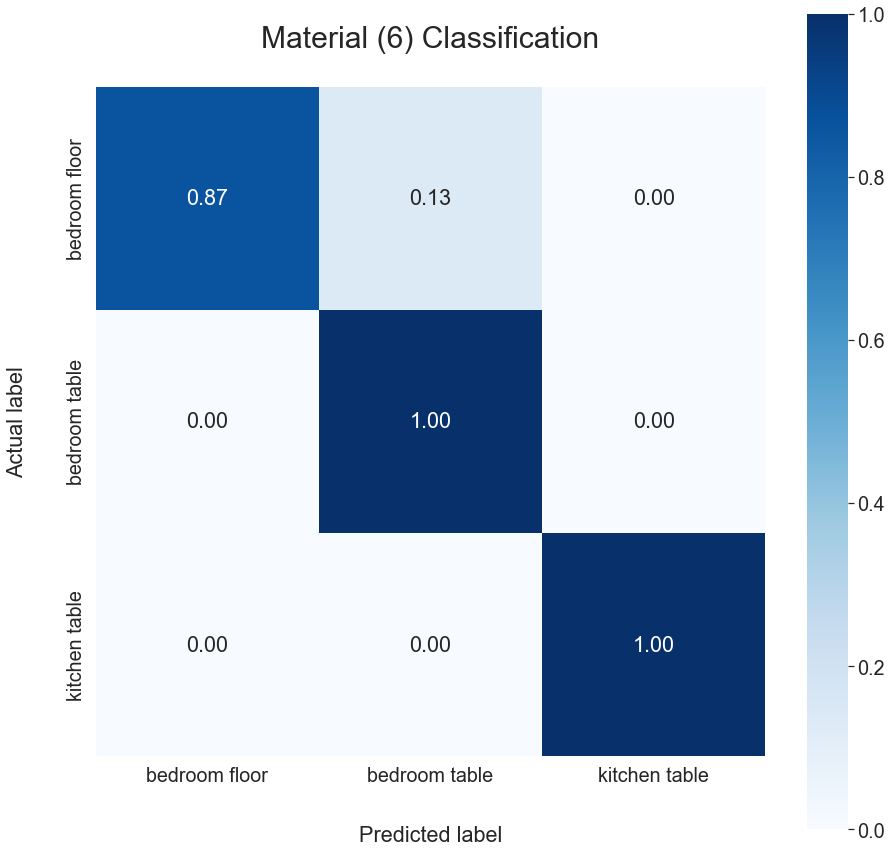

In [34]:
file_name = f'./confusion_matrix/{model_name}/confusion_matrix_{num_classes}class_{model_name}'
title = f'Material (6) Classification'

if not os.path.exists('./confusion_matrix'):
    os.mkdir('./confusion_matrix')

if not os.path.exists(f'./confusion_matrix/{model_name}'):
    os.mkdir(f'./confusion_matrix/{model_name}')

test_labels = test_flow.class_indices
print(test_labels)
predictions = tf.math.argmax(model.predict(TEST_IMAGES), axis=1)
cf = tf.math.confusion_matrix(TEST_LABELS, predictions).numpy()
cf = cf / cf.sum(axis=1)[:, np.newaxis]
df = pd.DataFrame(cf, index=CLASSES, columns=CLASSES)
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.8)
hm = sns.heatmap(df, annot=True, cmap='Blues', square=True, fmt='.2f')
plt.xlabel('Predicted label', labelpad=40)
plt.ylabel('Actual label', labelpad=40)
plt.title(title, y=1.03, pad=20, fontsize=30)
plt.savefig(file_name + '_transparent.png', transparent=True, bbox_inches="tight")
plt.savefig(file_name + '_white.png', transparent=False, facecolor='white', bbox_inches="tight")